In [1]:
import pandas as pd

# Análise exploratória dos dados

In [2]:
df  = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv")

In [3]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [4]:
df.shape

(17429, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

## Substituindo valores null com Interpolate

In [7]:
df['temperatura'] = df['temperatura'].interpolate(method= 'linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method= 'linear')


In [8]:
df.isnull().sum()

data_hora           0
contagem            0
temperatura         0
sensacao_termica    0
umidade             0
velocidade_vento    0
clima               0
feriado             0
fim_de_semana       0
estacao             0
dtype: int64

In [9]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


In [10]:
df.duplicated().sum() # verificando dados duplicados


15

In [11]:
duplicatas = df.duplicated(keep = False)
linhas_duplicadas = df[duplicatas]
linhas_duplicadas.sort_values(by = 'data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [12]:
df_limpo = df.drop_duplicates()

In [13]:
df_limpo.shape

(17414, 10)

In [14]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


## vizualização dos dados com gráficos

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

### Vizualização com histograma

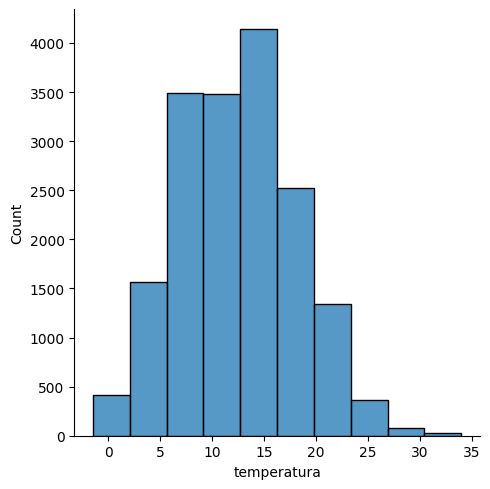

In [16]:
sns.displot(df_limpo, x= "temperatura", bins = 10)
plt.show()

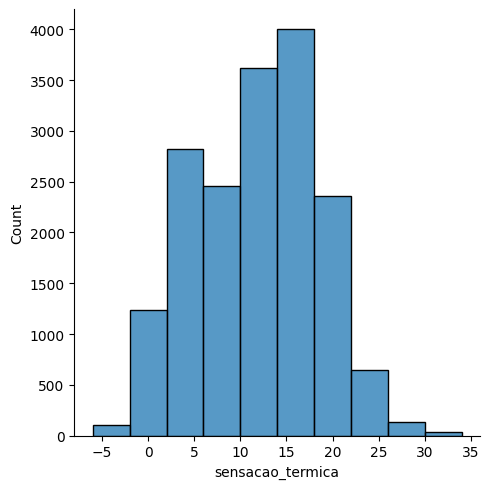

In [17]:
sns.displot(df_limpo, x= "sensacao_termica", bins = 10)
plt.show()

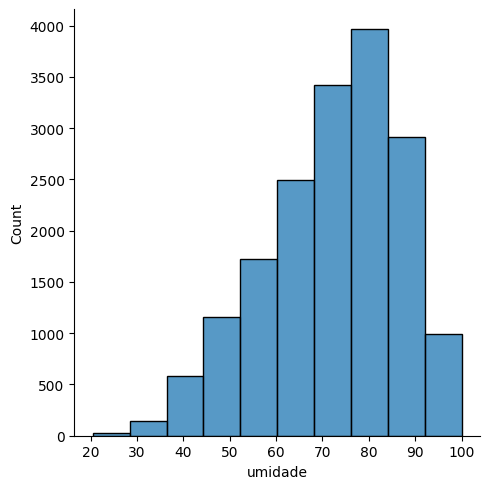

In [18]:
sns.displot(df_limpo, x= "umidade", bins = 10)
plt.show()

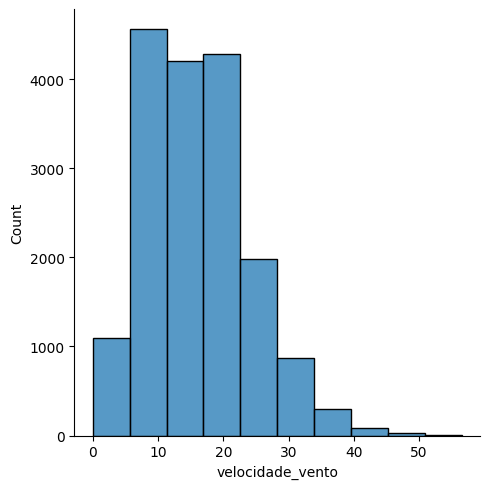

In [19]:
sns.displot(df_limpo, x= "velocidade_vento", bins = 10)
plt.show()

### Vizualização com gráfico de pontos

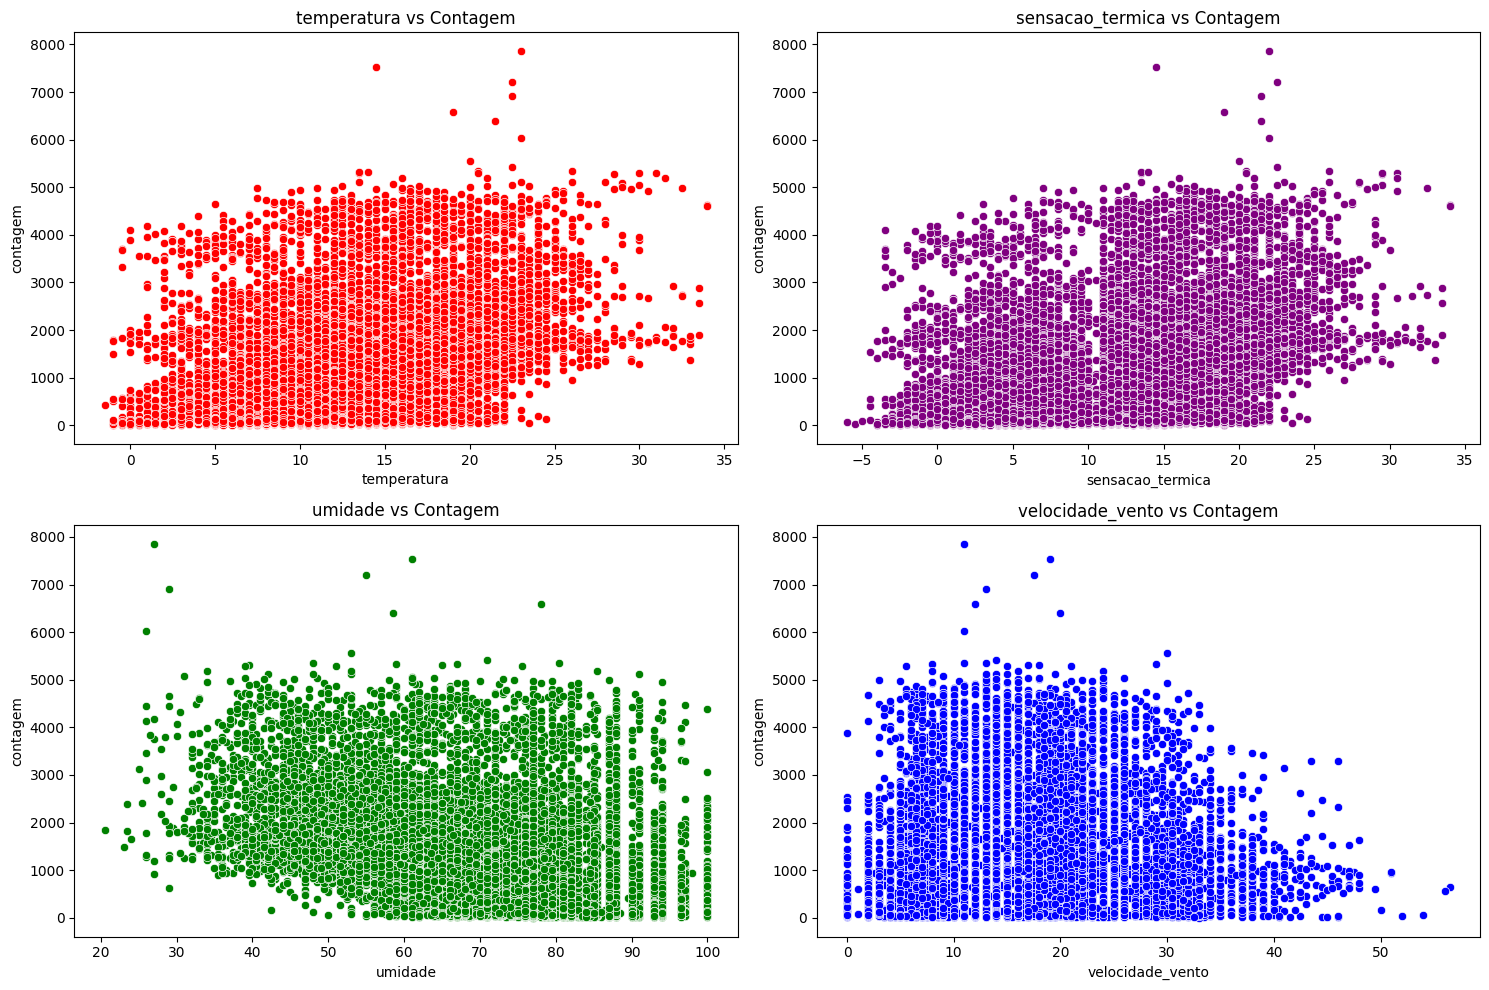

In [20]:
fig, axes = plt.subplots ( 2, 2, figsize = (15,10))

sns.scatterplot(ax= axes [0, 0], data = df_limpo, x = 'temperatura', y = 'contagem', color = 'red')
axes [0, 0].set_title('temperatura vs Contagem')


sns.scatterplot(ax= axes [ 0, 1], data = df_limpo, x = 'sensacao_termica', y = 'contagem', color = 'purple')
axes [0, 1].set_title('sensacao_termica vs Contagem')



sns.scatterplot(ax= axes [ 1, 0], data = df_limpo, x = 'umidade', y = 'contagem', color = 'green' )
axes [1, 0].set_title('umidade vs Contagem')


sns.scatterplot(ax= axes [ 1, 1], data = df_limpo, x = 'velocidade_vento', y = 'contagem', color = 'blue' )
axes [1, 1].set_title('velocidade_vento vs Contagem')

plt.tight_layout()
plt.show()

### Vizualização com o mapa de calor

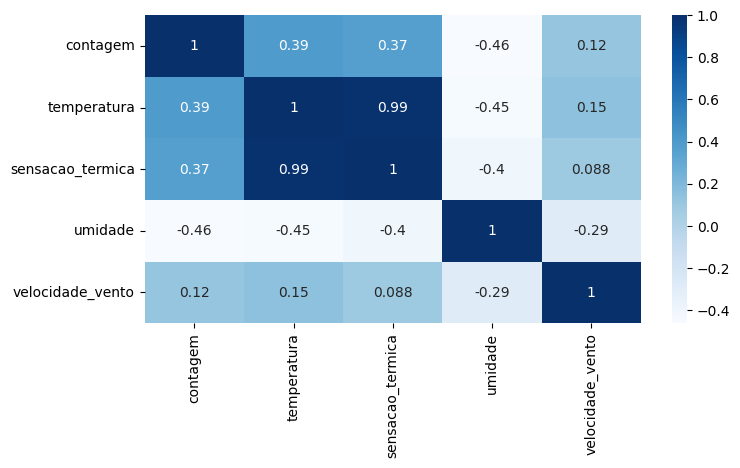

In [21]:
plt.figure(figsize = (8,4))

sns.heatmap(df_limpo.corr(numeric_only= True), annot= True, cmap= 'Blues')
plt.show()

### Analisando variaveis categóricas

In [22]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [23]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
    print(f"Coluna: {col}")
    print(df_limpo[col].unique())
    print("-"*15, '\n')



Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
--------------- 

Coluna: feriado
['Não' 'Sim']
--------------- 

Coluna: fim_de_semana
['Sim' 'Não']
--------------- 

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']
--------------- 



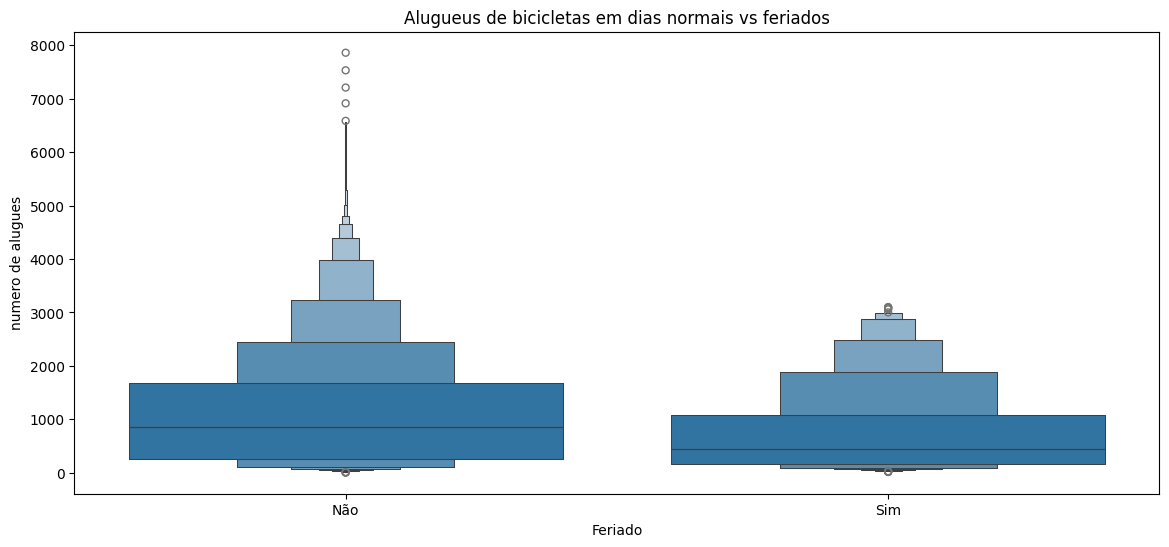

In [24]:
plt.figure( figsize= (14, 6) )
sns.boxenplot(x = 'feriado', y = 'contagem', data = df_limpo)
plt.title("Alugueus de bicicletas em dias normais vs feriados")
plt.xlabel('Feriado')
plt.ylabel('numero de alugues')
plt.show()

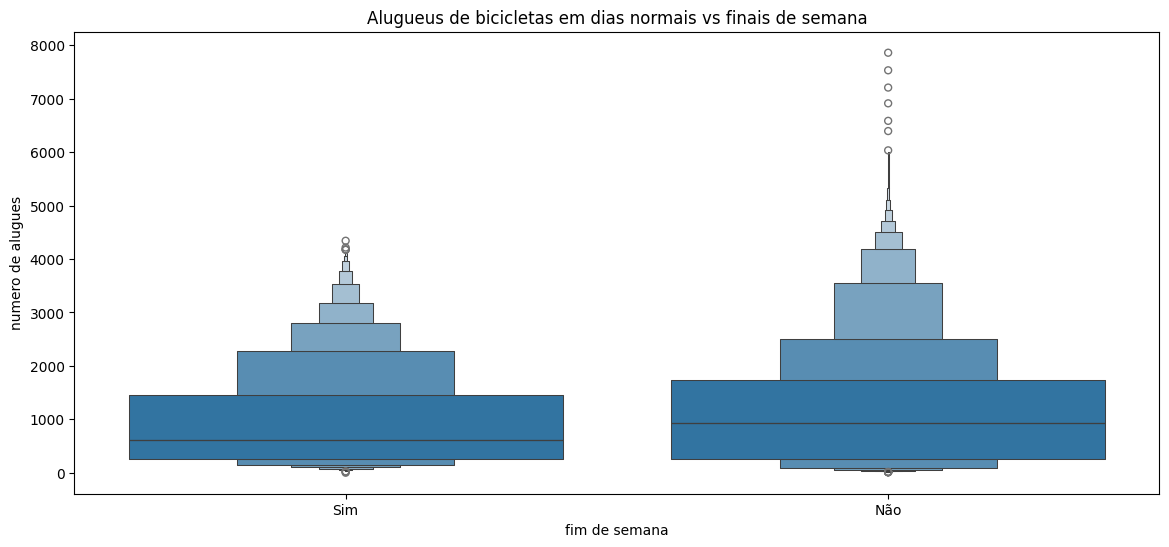

In [25]:
plt.figure( figsize= (14, 6) )
sns.boxenplot(x = 'fim_de_semana', y = 'contagem', data = df_limpo)
plt.title("Alugueus de bicicletas em dias normais vs finais de semana")
plt.xlabel('fim de semana')
plt.ylabel('numero de alugues')
plt.show()

In [26]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [27]:
mediana_feriado

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64

In [28]:
mediana_fim_de_semana

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64

In [29]:
df_clima = df_limpo.groupby(df_limpo['clima'])['contagem'].sum().reset_index().sort_values(by= 'contagem', ascending= False)
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


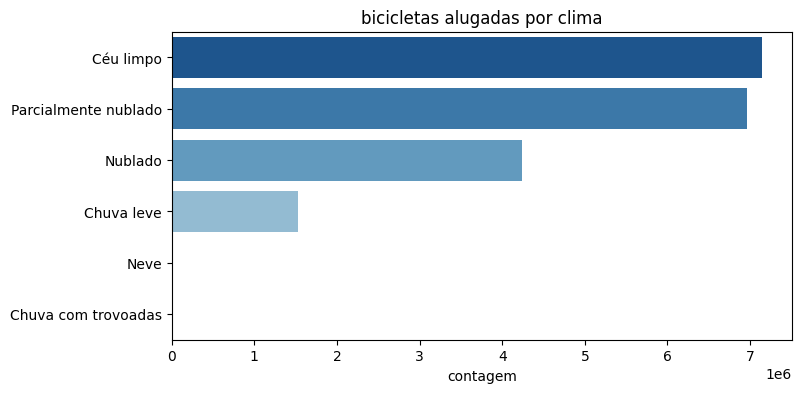

In [30]:
plt.figure (figsize = (8,4))
sns.barplot(data= df_clima, y = 'clima', x= 'contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('bicicletas alugadas por clima')
plt.xlabel('contagem')
plt.ylabel('')
plt.show()

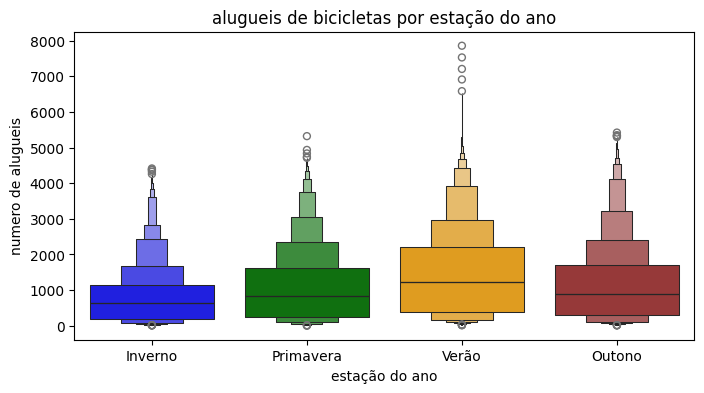

In [31]:
plt.figure(figsize=(8,4))

paleta_cores = {
    'Primavera':'green',
    'Verão':'orange',
    'Outono':'brown',
    'Inverno':'blue'
}

sns.boxenplot(x= 'estacao', y = 'contagem', data=df_limpo, hue='estacao', palette= paleta_cores)
plt.title('alugueis de bicicletas por estação do ano')
plt.xlabel('estação do ano')
plt.ylabel('numero de alugueis')
plt.show()

In [32]:
df_limpo.groupby('estacao')['contagem'].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

In [33]:
from scipy.stats import mannwhitneyu


In [34]:
primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']


In [35]:
u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic,p_value

(9044682.5, 0.0004762100221646296)

In [36]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [37]:
df_data = df_limpo.copy()

In [38]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [40]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour

In [41]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [42]:
df_data['data_hora'] = df_data['data_hora'].dt.date
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [43]:
df_data = df_data.rename(columns= {
    'data_hora' : 'data'
})

df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [44]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 1.6+ MB


In [45]:
df_data['data'] = pd.to_datetime(df_data['data'])


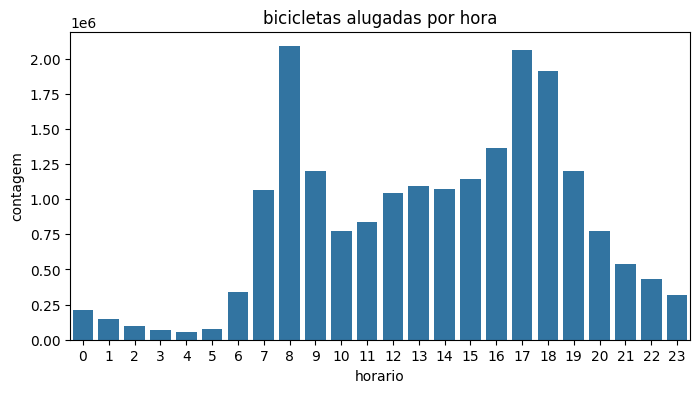

In [46]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure (figsize=(8,4))

sns.barplot(data=df_por_hora, x='horario', y= 'contagem')
plt.title('bicicletas alugadas por hora')
plt.xlabel('horario')
plt.ylabel('contagem')

plt.show()


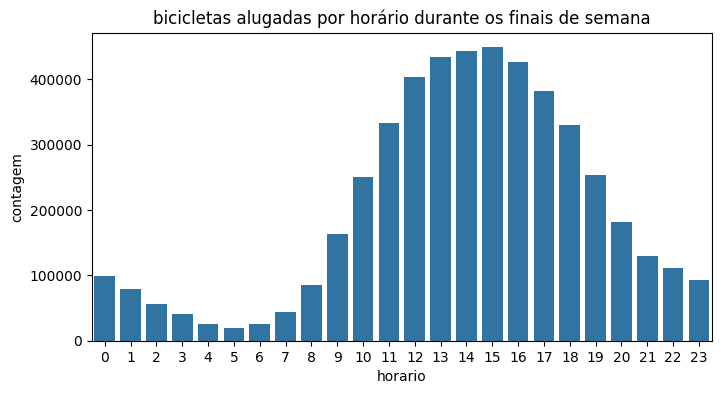

In [47]:
df_fim_semana = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fim_semana = df_fim_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure (figsize=(8,4))

sns.barplot(data=alugueis_fim_semana, x='horario', y= 'contagem')
plt.title('bicicletas alugadas por horário durante os finais de semana')
plt.show()


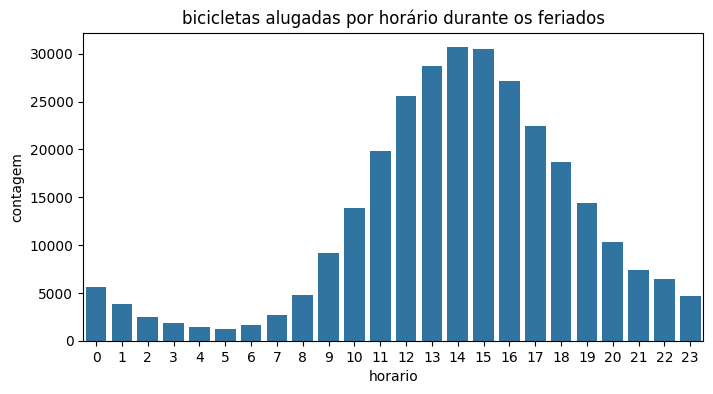

In [48]:
df_feriados = df_data[df_data['feriado'] == 'Sim']

alugueis_feriados = df_feriados.groupby('horario')['contagem'].sum().reset_index()

plt.figure (figsize=(8,4))

sns.barplot(data=alugueis_feriados, x='horario', y= 'contagem')
plt.title('bicicletas alugadas por horário durante os feriados')
plt.show()


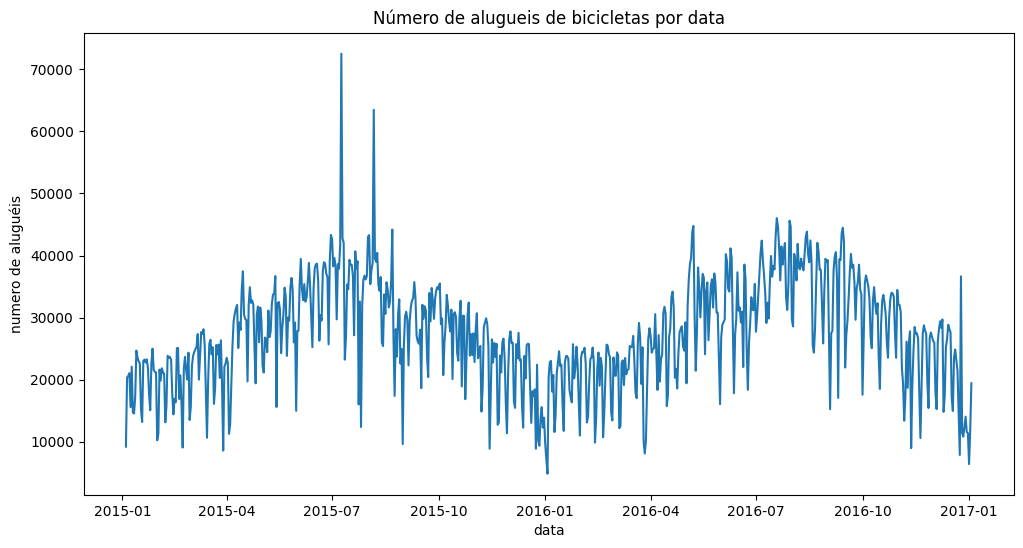

In [49]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))

sns.lineplot(data= df_tempo, x= 'data', y='contagem')
plt.title('Número de alugueis de bicicletas por data')
plt.xlabel('data')
plt.ylabel('numero de aluguéis')

plt.show()

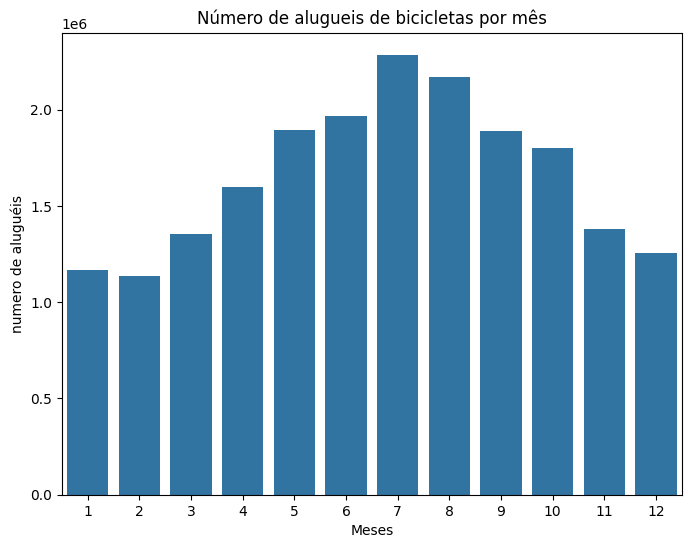

In [50]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

plt.figure(figsize=(8,6))

sns.barplot(data= alugueis_mensais, x= 'mes', y='contagem')
plt.title('Número de alugueis de bicicletas por mês')
plt.xlabel('Meses')
plt.ylabel('numero de aluguéis')

plt.show()

## Desenvolvendo modelo de previsão

In [51]:
from prophet import Prophet
import numpy as np

/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [52]:
df_prophet = df_data[['data','contagem']].rename(columns = {'data': 'ds',
                                                              'contagem': 'y'})

df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [53]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [54]:
np.random.seed(4587)

modelo = Prophet()

modelo.fit(df_prophet)

df_futuro = modelo.make_future_dataframe(periods=90, freq= 'D')
previsao = modelo.predict(df_futuro)

17:54:40 - cmdstanpy - INFO - Chain [1] start processing
17:54:40 - cmdstanpy - INFO - Chain [1] done processing


/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


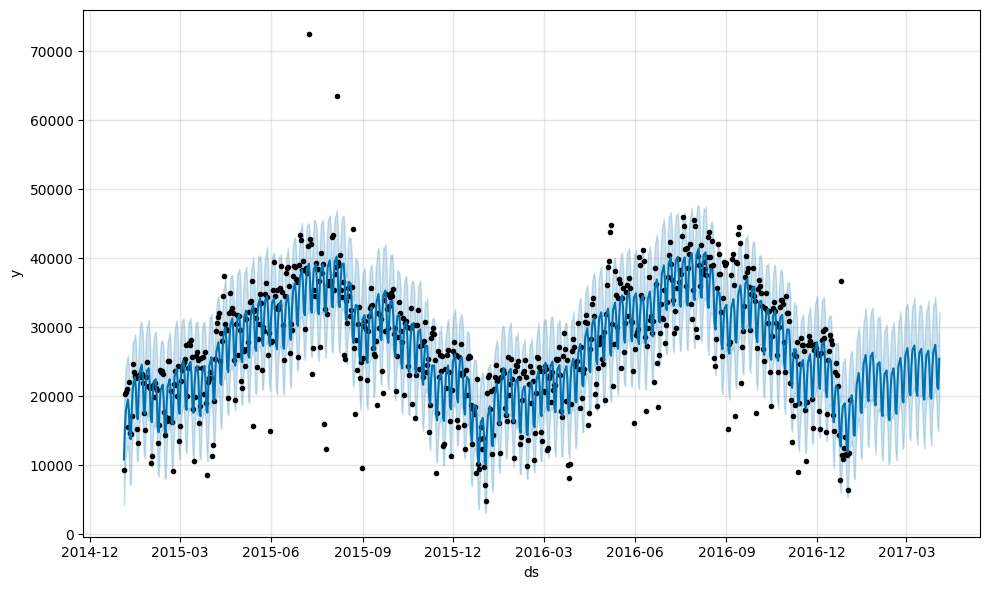

In [55]:
fig1 = modelo.plot(previsao)

In [56]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10836.660654,4252.764974,17058.189810
1,2015-01-05,15251.879694,8896.657443,22528.313673
2,2015-01-06,17960.157428,11817.046326,24317.272298
3,2015-01-07,18698.948121,12341.123576,25274.906637
4,2015-01-08,19515.168469,12813.838694,25939.428853
...,...,...,...,...
815,2017-03-30,27446.961622,21067.972518,34497.651206
816,2017-03-31,25673.970653,19529.965654,32137.464520
817,2017-04-01,21361.587982,15626.918171,27809.725175
818,2017-04-02,21039.191669,14924.504358,27316.929308


/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a 

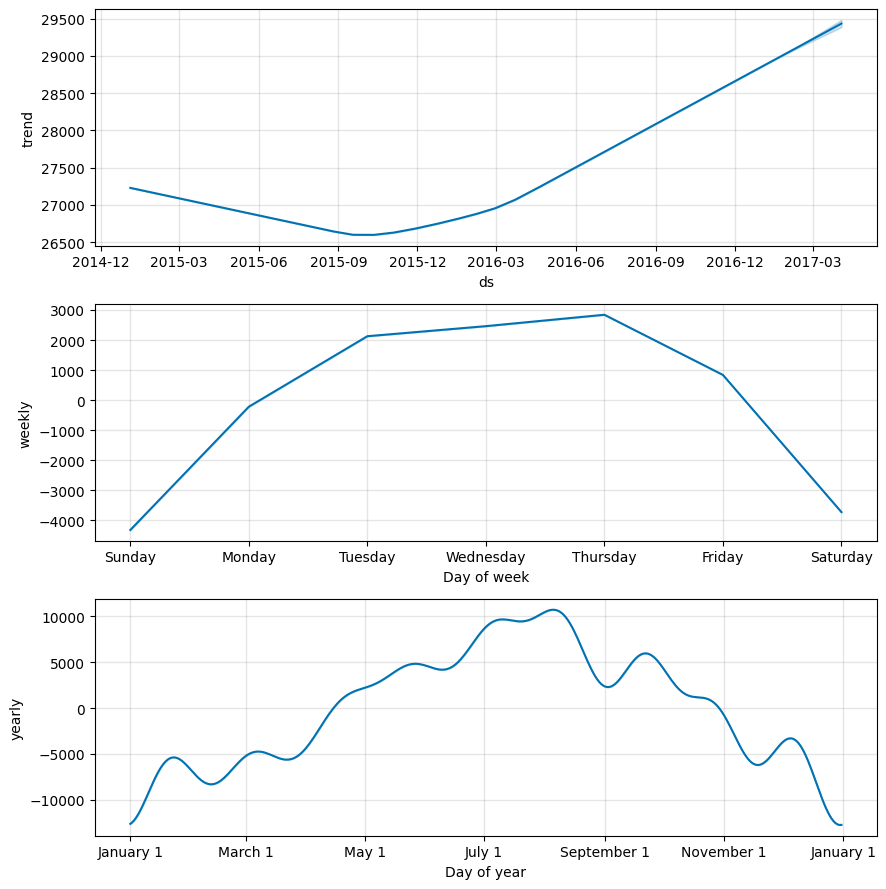

In [57]:
fig2 = modelo.plot_components(previsao)

In [58]:
df_prophet.shape

(730, 2)

In [59]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'][:584]  #treinando o modelo com 20%
df_treino['y'] = df_prophet['y'][:584] 


In [60]:
df_test = pd.DataFrame()

df_test['ds'] = df_prophet['ds'][584:] 
df_test['y'] = df_prophet['y'][584:] 

In [61]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_treino)

futuro = modelo.make_future_dataframe(periods=150, freq = "D")

previsao = modelo.predict(futuro)




17:54:41 - cmdstanpy - INFO - Chain [1] start processing
17:54:41 - cmdstanpy - INFO - Chain [1] done processing


/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


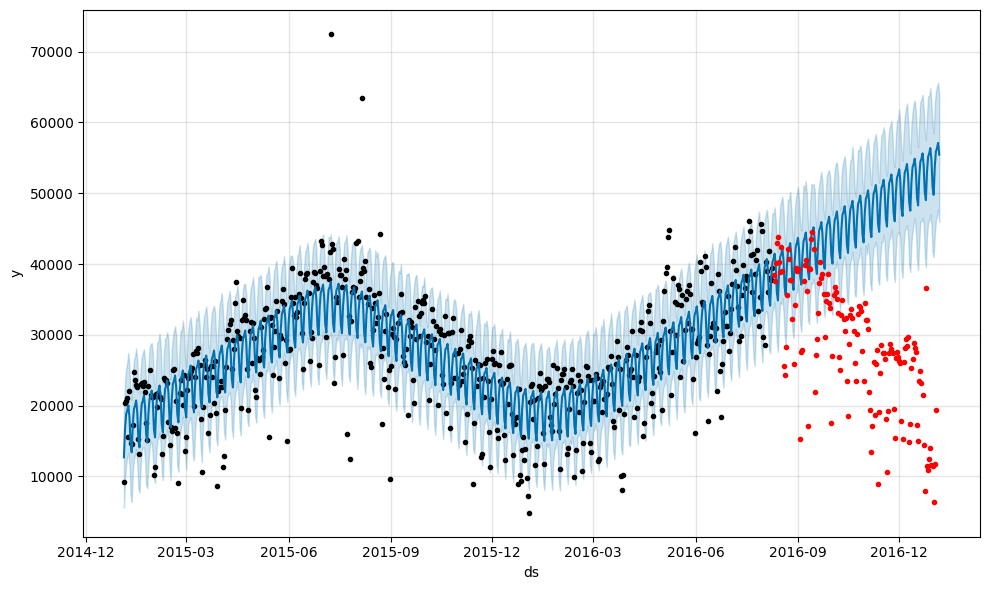

In [62]:
fig1 = modelo.plot(previsao)
plt.plot(df_test['ds'], df_test['y'], '.r')

/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


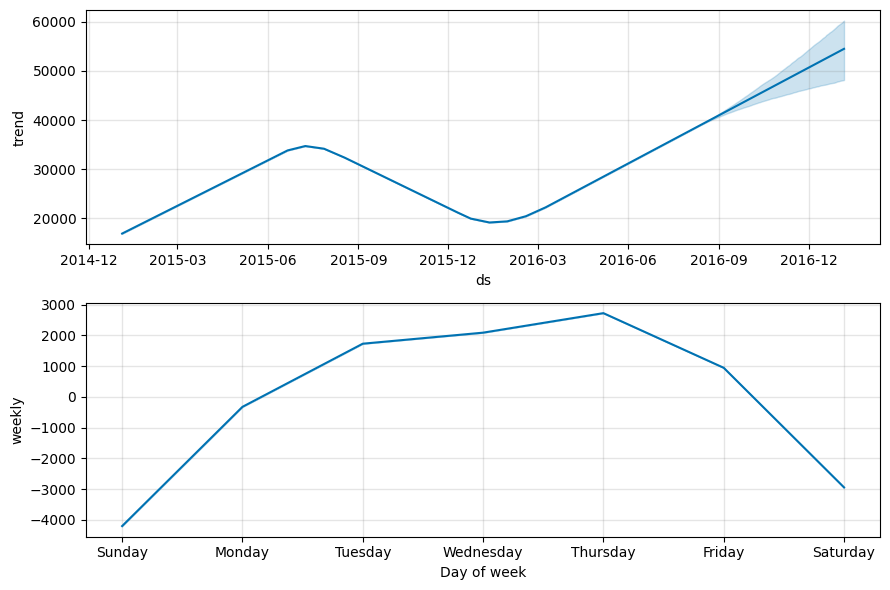

In [63]:
fig2 = modelo.plot_components(previsao)

In [64]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_test, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,40725.184942,38430
1,2016-08-11,41466.281613,37626
2,2016-08-12,39795.843042,40159
3,2016-08-13,36013.589469,43041
4,2016-08-14,34862.705989,43848
...,...,...,...
141,2016-12-30,54704.928774,11566
142,2016-12-31,50922.675202,11424
143,2017-01-01,49771.791722,6421
144,2017-01-02,53754.328193,11823


In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse} e RMSE: {rmse}')

MSE: 471996365.7116697 e RMSE: 21725.47734139965


In [67]:
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_treino)

futuro = modelo.make_future_dataframe(periods=150, freq = "D")

previsao = modelo.predict(futuro)




17:54:42 - cmdstanpy - INFO - Chain [1] start processing
17:54:42 - cmdstanpy - INFO - Chain [1] done processing


/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


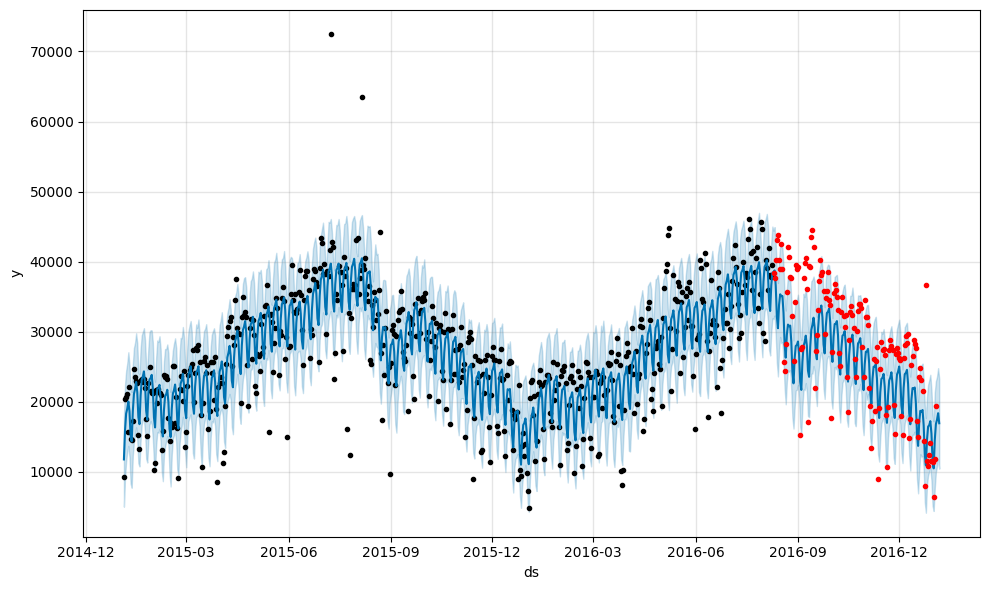

In [68]:
fig1 = modelo.plot(previsao)
plt.plot(df_test['ds'], df_test['y'], '.r')
plt.show()

/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a 

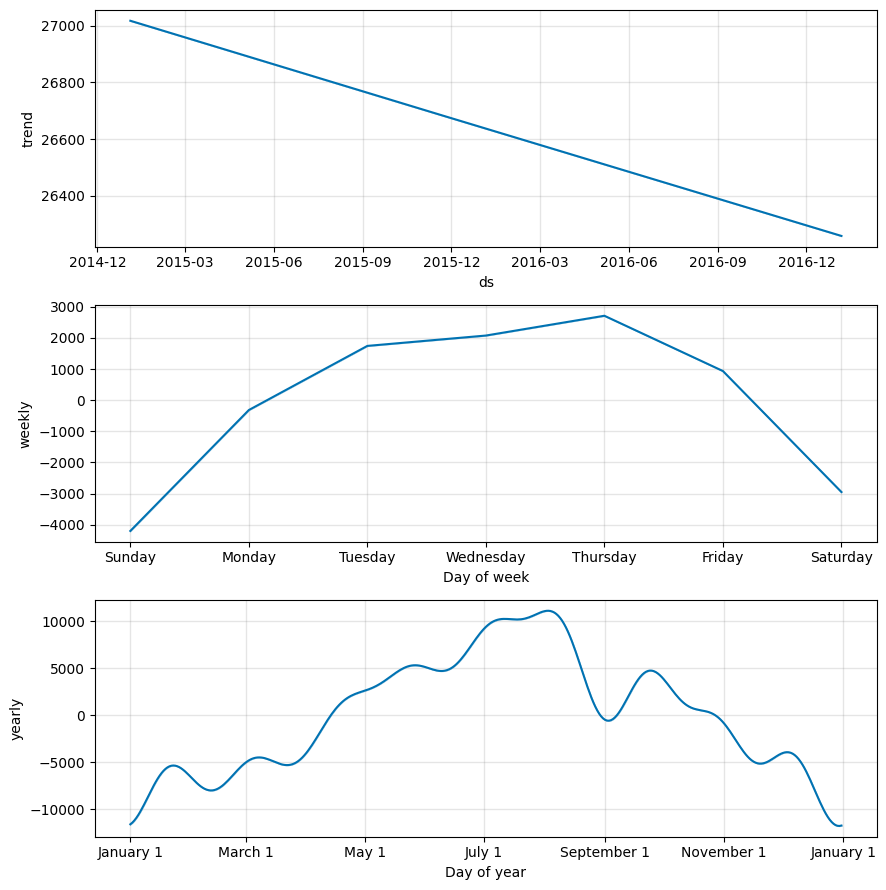

In [69]:
fig2 = modelo.plot_components(previsao)

In [70]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_test, on ='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38457.549939,38430
1,2016-08-11,38738.931529,37626
2,2016-08-12,36561.756163,40159
3,2016-08-13,32227.916264,43041
4,2016-08-14,30484.576357,43848
...,...,...,...
141,2016-12-30,15440.068203,11566
142,2016-12-31,11611.983035,11424
143,2017-01-01,10475.237479,6421
144,2017-01-02,14526.447742,11823


In [71]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse} e RMSE: {rmse}')

MSE: 38677602.713408954 e RMSE: 6219.131990351142


In [72]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

17:54:43 - cmdstanpy - INFO - Chain [1] start processing
17:54:43 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y']< previsao['yhat_upper'])]

In [74]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [75]:
df_treino = pd.DataFrame()
df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [76]:
df_test = pd.DataFrame()
df_test['ds'] = sem_outliers['ds'][505:]
df_test['y'] = sem_outliers['y'][505:]

In [77]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)

modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods= 150, freq= 'D')
previsao = modelo_sem_outliers.predict(futuro)

17:54:43 - cmdstanpy - INFO - Chain [1] start processing
17:54:43 - cmdstanpy - INFO - Chain [1] done processing


/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


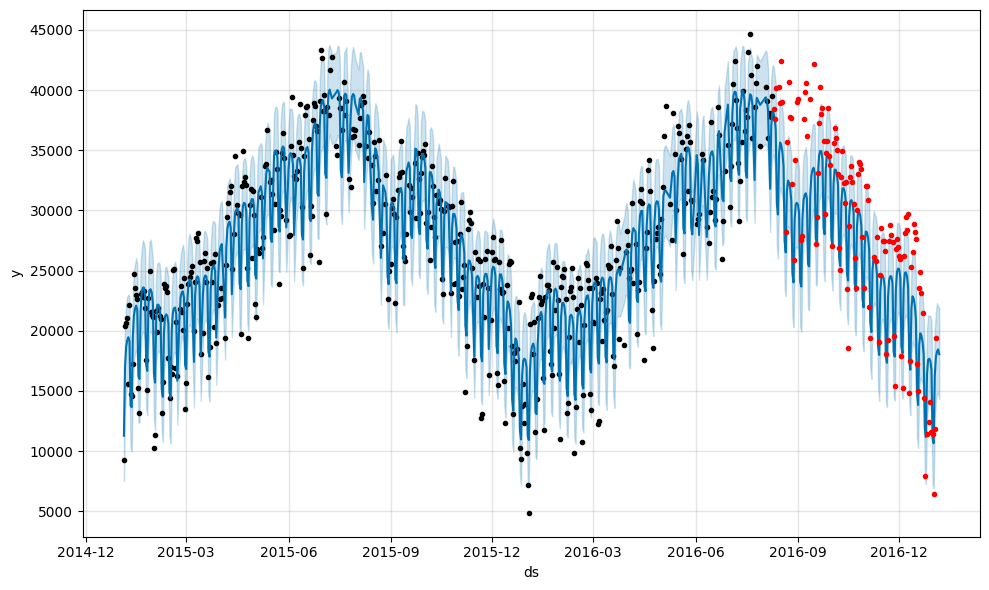

In [78]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_test['ds'], df_test['y'], '.r')

In [79]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_test, on ='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38131.252522,38430
1,2016-08-11,37716.103693,37626
2,2016-08-12,36671.485879,40159
3,2016-08-15,34699.101846,40236
4,2016-08-16,35641.129766,38911
...,...,...,...
120,2016-12-30,16769.218399,11566
121,2016-12-31,11062.862592,11424
122,2017-01-01,10643.931181,6421
123,2017-01-02,16248.143470,11823


In [80]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse} e RMSE: {rmse}')

MSE: 15666811.29172701 e RMSE: 3958.1322984113367


In [81]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)

modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods= 365, freq= 'D')
previsao = modelo_sem_outliers.predict(futuro)

17:54:44 - cmdstanpy - INFO - Chain [1] start processing
17:54:44 - cmdstanpy - INFO - Chain [1] done processing


/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/gemac/Desktop/analyze-and-forecast-time-series/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


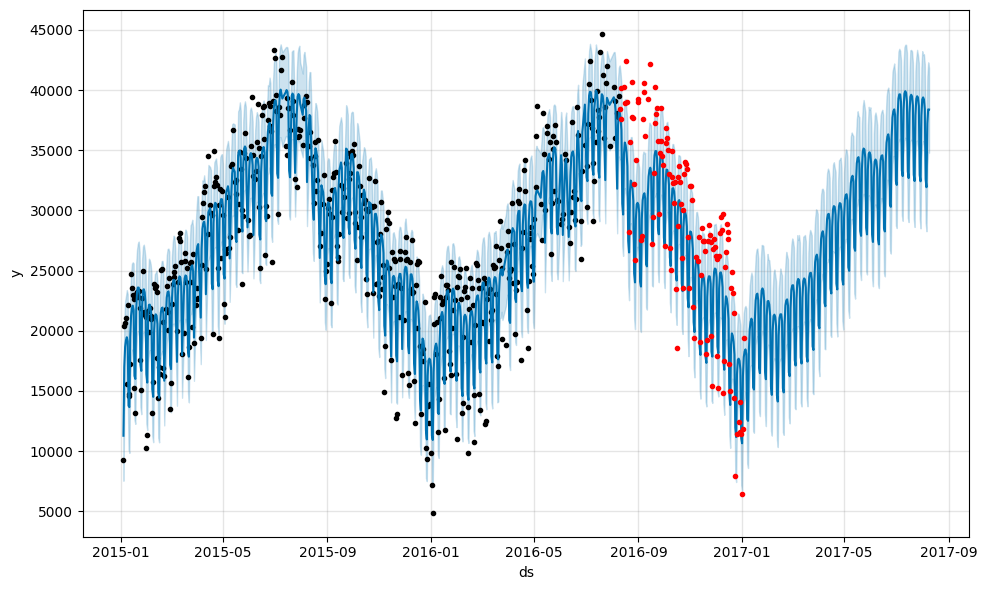

In [82]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_test['ds'], df_test['y'], '.r')